In [2]:
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
import sys
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
sys.path.insert(0, '../../src/')
from data_loader import load_data

In [3]:
seasons = load_data()

In [4]:
#succcesfull 3PT
successful_3PT= seasons.loc[((~seasons["HOMEDESCRIPTION"].str.contains('MISS', na=False)) & seasons['HOMEDESCRIPTION'].str.contains('3PT', na=False) | ((~seasons["VISITORDESCRIPTION"].str.contains('MISS', na=False)) & seasons['VISITORDESCRIPTION'].str.contains('3PT', na=False)))]

In [5]:
#missed 3PT
missed_3PT = seasons.loc[(seasons['HOMEDESCRIPTION'].str.contains('MISS') & seasons['HOMEDESCRIPTION'].str.contains('3PT')) | (seasons['VISITORDESCRIPTION'].str.contains('MISS') & seasons['VISITORDESCRIPTION'].str.contains('3PT'))]

In [17]:
per_season_stats = {}

per_season_stats['successful_3PT'] =successful_3PT.groupby("season_name")["GAME_ID"].count()
per_season_stats['missed_3PT'] =missed_3PT.groupby("season_name")["GAME_ID"].count()
per_season_stats["Field_goal_percent_3PT"] = per_season_stats['successful_3PT'] / (per_season_stats['successful_3PT'] + per_season_stats['missed_3PT'])
per_season_stats["3PT_made_per_game"] = successful_3PT.groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() /2
per_season_stats["3PT_attempt_per_game"] = per_season_stats["3PT_made_per_game"] + missed_3PT.groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean()/2
#

per_season_stats = pd.DataFrame(per_season_stats)
per_season_stats

,successful_3PT,missed_3PT,Field_goal_percent_3PT,3PT_made_per_game,3PT_attempt_per_game
season_name,,,,,
2000-01,11524,21073,0.353529,4.846089,13.707738
2001-02,12402,22672,0.353595,5.215307,14.749369
2002-03,12200,22713,0.349440,5.134680,14.685984
2003-04,12322,23171,0.347167,5.190396,14.934298
2004-05,13777,24971,0.355554,5.600407,15.751220
2005-06,14086,25227,0.358304,5.726016,15.980894
2006-07,14926,26745,0.358187,6.067480,16.939431
2007-08,16124,28420,0.361979,6.554472,18.107317
2008-09,16352,28231,0.366777,6.647154,18.123171


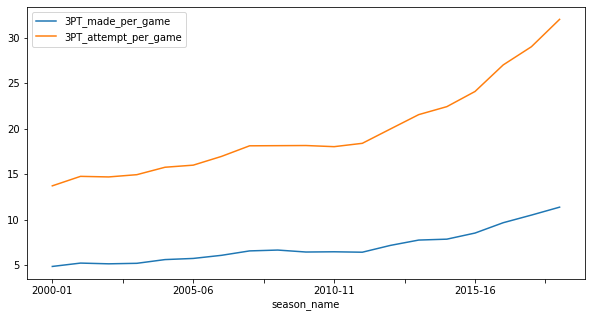

In [18]:
per_season_stats["3PT_made_per_game"].plot(figsize=(10,5))
per_season_stats["3PT_attempt_per_game"].plot(figsize=(10,5))

plt.legend()
plt.show()

<AxesSubplot:xlabel='season_name'>

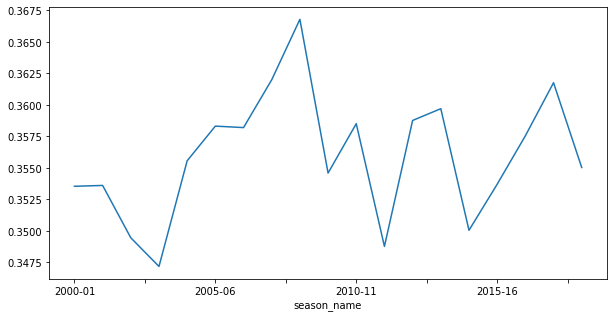

In [19]:
per_season_stats["Field_goal_percent_3PT"].plot(figsize=(10,5))